# Estimation of Energy Efficiency for a Building

Dataset Information:

We utilize 12 different building shapes simulated in Ecotect for energy analysis. The dataset comprises a total of 768 buildings, each structured with 10 variables. Among these variables are the dependent variables we aim to predict: heating load and cooling load.

Variables:

- x1 relative compactness
- x2 surface area
- x3 wall area
- x4 roof area
- x5 overall height
- x6 orientation
- x7 glazing area
- x8 glazing area distribution
- y1 Heating Load
- y2 Cooling Load


# Section 1: EXPLORATORY DATA ANALYSIS
- Reading the Dataset
- Column Names of the Dataset
- Renaming Column Names of the Dataset
- Transposed Descriptive Statistics of the Dataset
- Presentation of Descriptive Statistics of the Dataset in Tabular Form
- Overview of the Dataset
- Detection of Numerical and Categorical Variables in the Dataset
- Examination of Categorical Variables
- Examination of Numerical Variables
- Target Variable Analysis
- Correlation Analysis
# Section 2: FEATURE ENGINEERING
- Outlier Analysis
- Missing Values
- Label Encoding
- Feature Scaling
# Section 3: MODEL BUILDING AND PERFORMANCE
- Splitting into Training - Validation - Test datasets
- Setting up Base Models
- Hyperparameter Optimization
- Ensemble Model Created from the Best Models
- Error Rate in the Most Successful Model
- Model Logging
- Model Invocation

## SECTİON 1
## 1.  EXPLORATORY DATA ANALYSIS

### Required Libraries

In [1]:
import numpy as np# Efficient Usage of Multidimensional Arrays and Matrices
import pandas as pd # For DataFrame Operations

import random

#######Data Visualization#########
import matplotlib.pyplot as plt
import seaborn as sns

#######The library commonly used for success metrics#########
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

#The library commonly used for hyperparameter optimization
from sklearn.model_selection import GridSearchCV, cross_validate

#The library commonly used for splitting the dataset into training set
from sklearn.model_selection import train_test_split

#Label Encoding Process
from sklearn.preprocessing import LabelEncoder

#The library used to scale the data to a specific range
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler



### 1.1. Reading the Dataset


In [2]:
df=pd.read_csv("Estimation_of_Energy_Efficiency_for_a_Building.csv")
df.drop('Y2', axis=1, inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


### 1.2. Column Names of the Dataset

In [3]:
df.columns.to_list()#kolon isimleri

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1']

### 1.3. Renaming Column Names of the Dataset

In [4]:
#değişken(kolon) ismi değiştirme


new_name = {
    'X1': 'relative_compactness',
    'X2': 'surface_area',
    'X3': 'wall_area',
    'X4': 'roof_area',
    'X5': 'overall_height',
    'X6': 'orientation',
    'X7': 'glazing_area',
    'X8': 'glazing_area_distribution',
    'Y1': 'heating_load',
}



df.rename(columns=new_name, inplace=True)
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


### 1.4. Transposed Descriptive Statistics of the Dataset


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10


### 1.5. Presentation of Descriptive Statistics of the Dataset in Tabular Form

In [6]:
from tabulate import tabulate
betimsel_istatistikler = df.describe()
table = tabulate(betimsel_istatistikler, headers='keys', tablefmt='fancy_grid',numalign='center',stralign='center')
print(table)

╒═══════╤════════════════════════╤════════════════╤═════════════╤═════════════╤══════════════════╤═══════════════╤════════════════╤═════════════════════════════╤════════════════╕
│       │  relative_compactness  │  surface_area  │  wall_area  │  roof_area  │  overall_height  │  orientation  │  glazing_area  │  glazing_area_distribution  │  heating_load  │
╞═══════╪════════════════════════╪════════════════╪═════════════╪═════════════╪══════════════════╪═══════════════╪════════════════╪═════════════════════════════╪════════════════╡
│ count │          768           │      768       │     768     │     768     │       768        │      768      │      768       │             768             │      768       │
├───────┼────────────────────────┼────────────────┼─────────────┼─────────────┼──────────────────┼───────────────┼────────────────┼─────────────────────────────┼────────────────┤
│ mean  │        0.764167        │    671.708     │    318.5    │   176.604   │       5.25       │      3

### 1.6. Overview of the Dataset

In [7]:


def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape) # satır sütun sayısı.
    print("##################### Types #####################")
    print(dataframe.dtypes) # değişkenleri veri tipi
    print("##################### Head #####################")
    print(dataframe.head(head)) # veri setinde ilk 5 değişken
    print("##################### Tail #####################")
    print(dataframe.tail(head))  #veri setinde son 5 satır
    print("##################### NA #####################")
    print(dataframe.isnull().sum()) # Değişkenlerin boş satır sayısı.
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

df.head()
df.info()

##################### Shape #####################
(768, 9)
##################### Types #####################
relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                    int64
glazing_area                 float64
glazing_area_distribution      int64
heating_load                 float64
dtype: object
##################### Head #####################
   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glaz

### 1.7. Detection of Numerical and Categorical Variables in the Dataset

In [8]:
##################################
# CAPTURING NUMERICAL AND CATEGORICAL VARIABLES
##################################

# If a column has fewer unique values than the specified threshold (e.g., 10 as defined below), it will be treated as categorical.
# If a column has fewer unique values than the specified threshold (e.g., 20 as defined below), it will be treated as numerical.
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
                DataFrame from which variable names are to be taken
        cat_th: int, optional
                Class threshold value for numerical but categorical variables
        car_th: int, optional
                Class threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of categorical-looking but cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)




Observations: 768
Variables: 9
cat_cols: 6
num_cols: 3
cat_but_car: 0
num_but_cat: 6


### 1.8. Examination of Categorical Variables

In [9]:
cat_cols

['wall_area',
 'roof_area',
 'overall_height',
 'orientation',
 'glazing_area',
 'glazing_area_distribution']

#### 1.8.1. Distribution of Categorical Variables

In [10]:
def cat_summary(dataframe, col_name, plot=True):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

       wall_area      Ratio
294.0        192  25.000000
318.5        192  25.000000
343.0        128  16.666667
416.5         64   8.333333
245.0         64   8.333333
269.5         64   8.333333
367.5         64   8.333333
##########################################


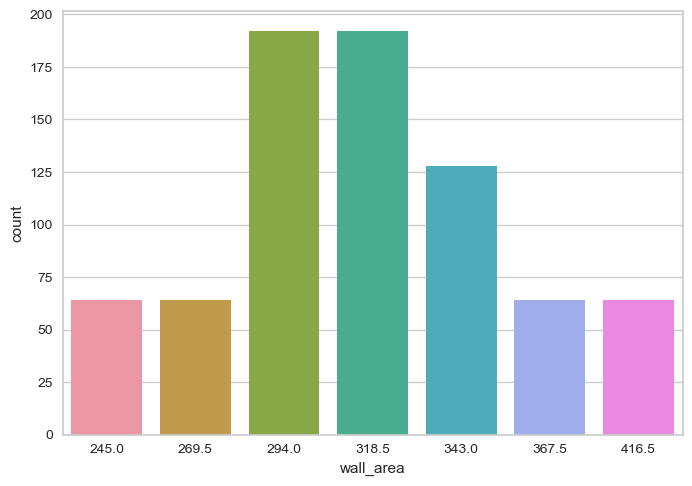

        roof_area      Ratio
220.50        384  50.000000
147.00        192  25.000000
122.50        128  16.666667
110.25         64   8.333333
##########################################


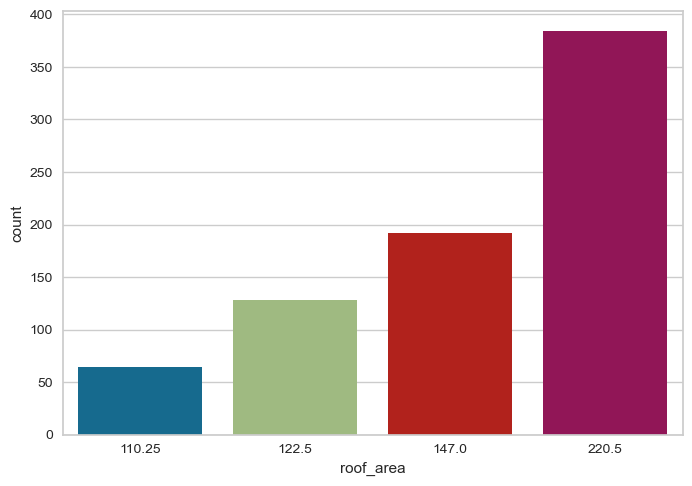

     overall_height  Ratio
7.0             384   50.0
3.5             384   50.0
##########################################


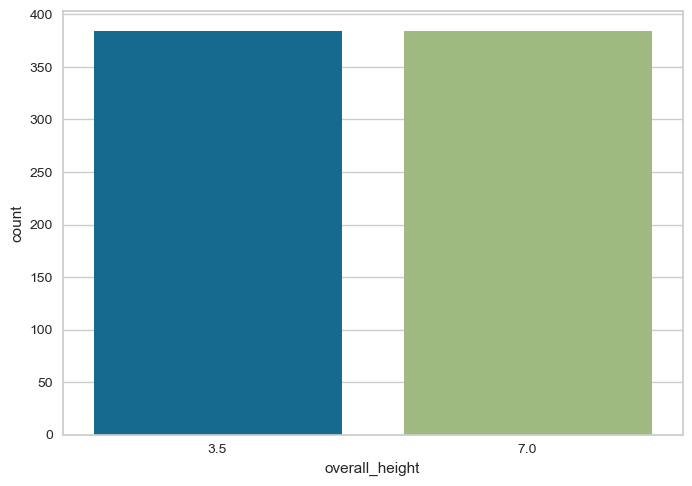

   orientation  Ratio
2          192   25.0
3          192   25.0
4          192   25.0
5          192   25.0
##########################################


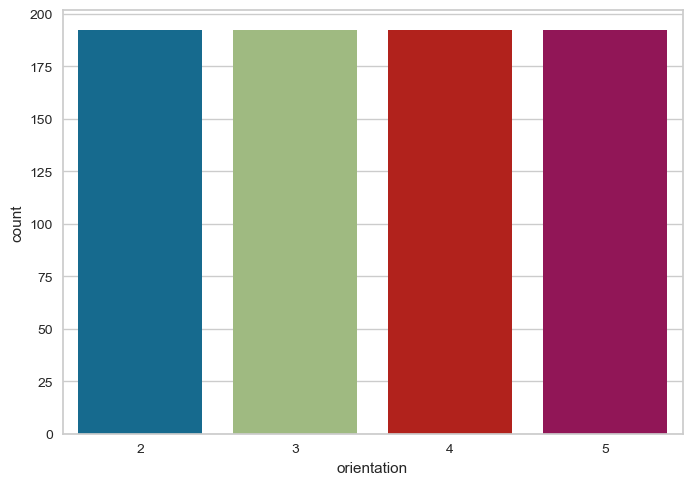

      glazing_area  Ratio
0.10           240  31.25
0.25           240  31.25
0.40           240  31.25
0.00            48   6.25
##########################################


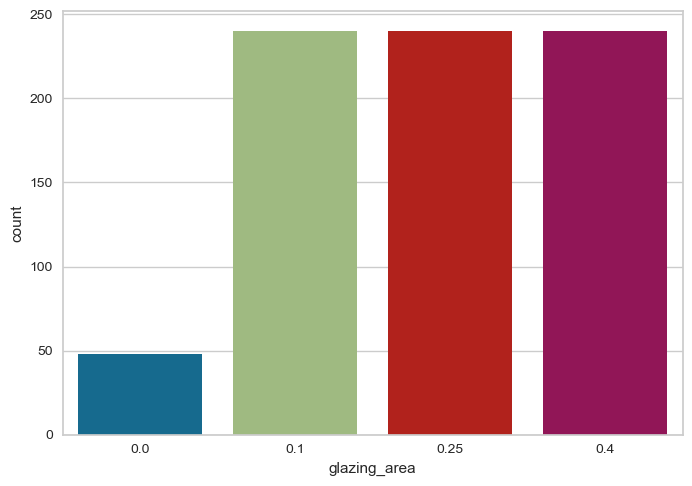

   glazing_area_distribution  Ratio
1                        144  18.75
2                        144  18.75
3                        144  18.75
4                        144  18.75
5                        144  18.75
0                         48   6.25
##########################################


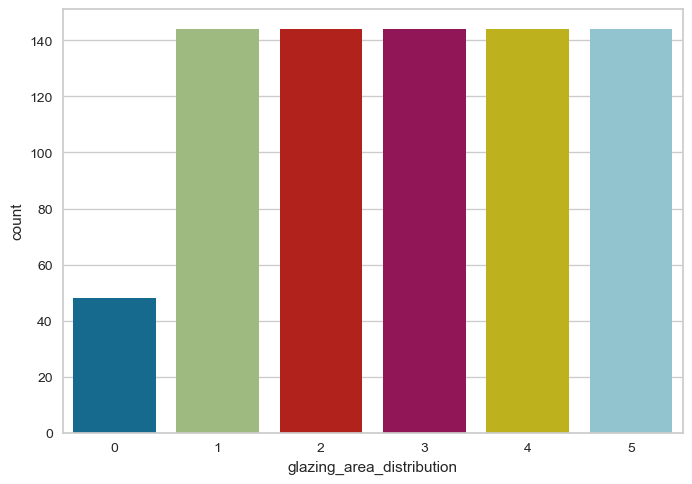

In [11]:
for col in cat_cols:
    cat_summary(df, col)

### 1.9. Examination of Numerical Variables

In [12]:
num_cols

['relative_compactness', 'surface_area', 'heating_load']

#### 1.9.1.Distribution of Numerical Variables

In [13]:
def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    768.000000
mean       0.764167
std        0.105777
min        0.620000
5%         0.620000
10%        0.640000
20%        0.660000
30%        0.690000
40%        0.710000
50%        0.750000
60%        0.790000
70%        0.820000
80%        0.860000
90%        0.900000
95%        0.980000
99%        0.980000
max        0.980000
Name: relative_compactness, dtype: float64


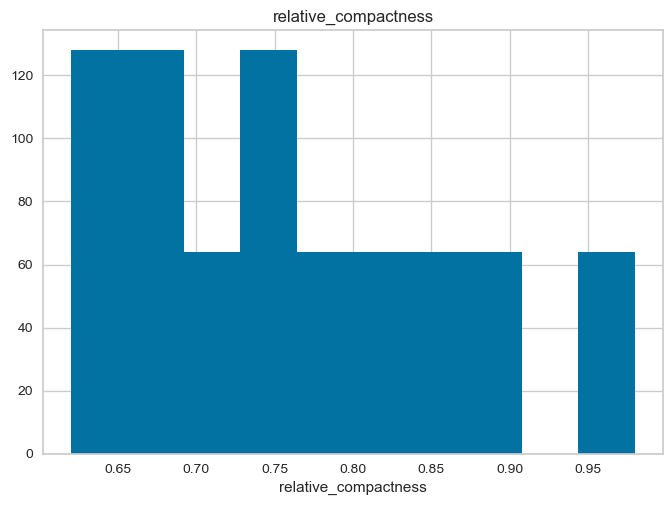

count    768.000000
mean     671.708333
std       88.086116
min      514.500000
5%       514.500000
10%      563.500000
20%      588.000000
30%      612.500000
40%      637.000000
50%      673.750000
60%      710.500000
70%      735.000000
80%      759.500000
90%      784.000000
95%      808.500000
99%      808.500000
max      808.500000
Name: surface_area, dtype: float64


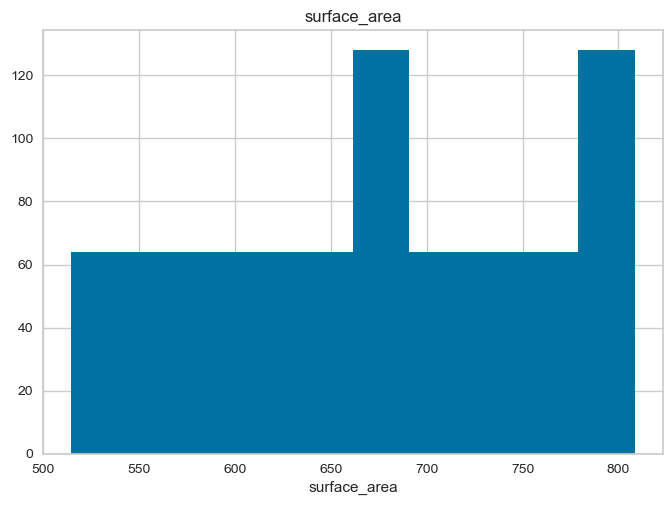

count    768.000000
mean      22.307201
std       10.090196
min        6.010000
5%        10.463500
10%       11.217000
20%       12.630000
30%       14.320000
40%       15.230000
50%       18.950000
60%       25.668000
70%       29.089000
80%       32.508000
90%       36.703000
95%       39.860000
99%       42.089900
max       43.100000
Name: heating_load, dtype: float64


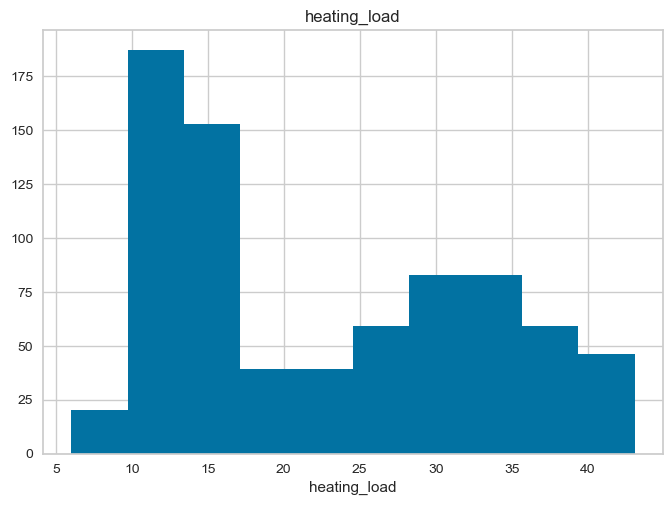

In [14]:
for col in num_cols:
    num_summary(df, col, plot=True)

### 1.10 Target Variable Analysis

In [16]:
df["heating_load"].value_counts()

15.16    6
13.00    5
15.55    4
10.68    4
28.15    4
        ..
10.47    1
33.21    1
36.77    1
36.71    1
16.64    1
Name: heating_load, Length: 586, dtype: int64


#### 10.1.1. Analysis of the Target Variable with Categorical Variables


In [17]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [18]:
for col in cat_cols:
    target_summary_with_cat(df, "heating_load", col)

           TARGET_MEAN
wall_area             
245.0        11.886719
269.5        12.040156
294.0        22.862604
318.5        23.333646
343.0        27.611641
367.5        14.283281
416.5        35.664219


           TARGET_MEAN
roof_area             
110.25       27.646250
122.50       33.646563
147.00       30.905312
220.50       13.338516


                TARGET_MEAN
overall_height             
3.5               13.338516
7.0               31.275885


             TARGET_MEAN
orientation             
2              22.312865
3              22.380677
4              22.259896
5              22.275365


              TARGET_MEAN
glazing_area             
0.00            14.286458
0.10            20.357167
0.25            22.756917
0.40            25.411667


                           TARGET_MEAN
glazing_area_distribution             
0                            14.286458
1                            23.026111
2                            22.934444
3                            22.


#### 10.1.2. The Analysis of Target Variable with Numerical Variables


In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [20]:
for col in num_cols:
    target_summary_with_num(df, "heating_load", col)



              relative_compactness
heating_load                      
6.01                          0.74
6.04                          0.74
6.05                          0.74
6.07                          0.74
6.37                          0.71
...                            ...
42.62                         0.79
42.74                         0.79
42.77                         0.79
42.96                         0.79
43.10                         0.79

[586 rows x 1 columns]


              surface_area
heating_load              
6.01                 686.0
6.04                 686.0
6.05                 686.0
6.07                 686.0
6.37                 710.5
...                    ...
42.62                637.0
42.74                637.0
42.77                637.0
42.96                637.0
43.10                637.0

[586 rows x 1 columns]


              heating_load
heating_load              
6.01                  6.01
6.04                  6.04
6.05                  6.05
6.07   

### 1.11. Correlation Analysis

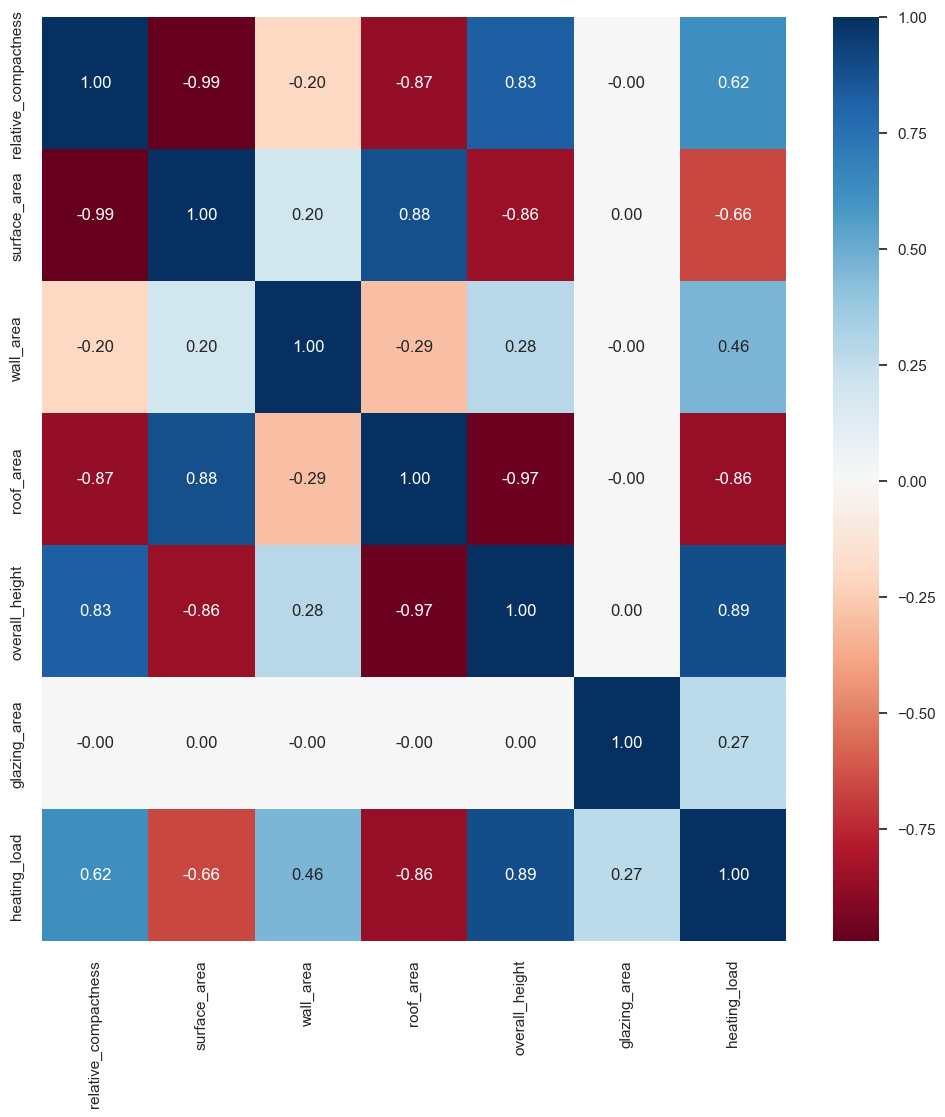

In [21]:

num_cols = [col for col in df.columns if df[col].dtype in [int, float]]

corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True, fmt=".2f")
plt.show()


####  1.11.1. Correlation Analysis Matrix Table

In [22]:
#korelasyon matrisi tablosu
cor_matrix = df.corr().abs()
cor_matrix

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
relative_compactness,1.000000e+00,9.919015e-01,2.037817e-01,8.688234e-01,8.277473e-01,4.678592e-17,2.960552e-15,7.107006e-16,0.622272
surface_area,9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,8.581477e-01,3.459372e-17,3.636925e-15,2.438409e-15,0.658120
wall_area,2.037817e-01,1.955016e-01,1.000000e+00,2.923165e-01,2.809757e-01,2.429499e-17,8.567455e-17,2.067384e-16,0.455671
roof_area,8.688234e-01,8.807195e-01,2.923165e-01,1.000000e+00,9.725122e-01,5.830058e-17,1.759011e-15,1.078071e-15,0.861828
overall_height,8.277473e-01,8.581477e-01,2.809757e-01,9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,2.920613e-17,0.889431
orientation,4.678592e-17,3.459372e-17,2.429499e-17,5.830058e-17,4.492205e-17,1.000000e+00,9.406007e-16,2.549352e-16,0.002587
glazing_area,2.960552e-15,3.636925e-15,8.567455e-17,1.759011e-15,1.489134e-17,9.406007e-16,1.000000e+00,2.129642e-01,0.269841
glazing_area_distribution,7.107006e-16,2.438409e-15,2.067384e-16,1.078071e-15,2.920613e-17,2.549352e-16,2.129642e-01,1.000000e+00,0.087368
heating_load,6.222722e-01,6.581202e-01,4.556712e-01,8.618283e-01,8.894307e-01,2.586534e-03,2.698410e-01,8.736759e-02,1.000000


#### 1.11.2. Correlation Analysis Matrix Table 2

In [23]:
upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load
relative_compactness,NaN,0.991901,0.203782,0.868823,0.827747,4.678592e-17,2.960552e-15,7.107006e-16,0.622272
surface_area,NaN,NaN,0.195502,0.880720,0.858148,3.459372e-17,3.636925e-15,2.438409e-15,0.658120
wall_area,NaN,NaN,NaN,0.292316,0.280976,2.429499e-17,8.567455e-17,2.067384e-16,0.455671
roof_area,NaN,NaN,NaN,NaN,0.972512,5.830058e-17,1.759011e-15,1.078071e-15,0.861828
overall_height,NaN,NaN,NaN,NaN,NaN,4.492205e-17,1.489134e-17,2.920613e-17,0.889431
orientation,NaN,NaN,NaN,NaN,NaN,NaN,9.406007e-16,2.549352e-16,0.002587
glazing_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.129642e-01,0.269841
glazing_area_distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087368
heating_load,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Section 2

## 2. Feature Enginerring

### 2.1. Outlier Analysis

#### 2.1.1. Defining the IQR (Interquartile Range) Function for Boxplot Method

In [64]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

#### 2.1.2. Determining the Lower and Upper Limits of IQR

In [65]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


#### 2.1.3. Variables with Outliers

In [66]:
for col in num_cols:
    print(col, check_outlier(df, col))

bagil_kompaktlik False
yuzey_alani False
duvar_alani False
cati_alani False
toplam_yukseklik False
cam_alani False
isitma_yuku False


### 2.2. Missing Values

In [67]:
df.isnull().values.any()

False

In [68]:
df.isnull().sum().sum()# eksik veri sayısı

0

eksik verimiz yok.

### 2.3. Encoding

In [69]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


# cat_cols, num_cols, cat_but_car = grab_col_names(df)

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


one_hot_encoder(df, ohe_cols).head()

,bagil_kompaktlik,yuzey_alani,toplam_yukseklik,isitma_yuku,duvar_alani_269.5,duvar_alani_294.0,duvar_alani_318.5,duvar_alani_343.0,duvar_alani_367.5,duvar_alani_416.5,...,oryantasyon_4,oryantasyon_5,cam_alani_0.1,cam_alani_0.25,cam_alani_0.4,cam_alani_dagilimi_1,cam_alani_dagilimi_2,cam_alani_dagilimi_3,cam_alani_dagilimi_4,cam_alani_dagilimi_5
0,0.98,514.5,7.0,15.55,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.98,514.5,7.0,15.55,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.98,514.5,7.0,15.55,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.98,514.5,7.0,15.55,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.90,563.5,7.0,20.84,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2.4. Feature Scaling

In [70]:
y = df["isitma_yuku"]
X = df.drop(["isitma_yuku"], axis=1)

In [71]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: isitma_yuku, dtype: float64

In [72]:
scaler= RobustScaler()
df[X.columns.to_list()]=scaler.fit_transform(df[X.columns.to_list()])

In [73]:
df.head()

,bagil_kompaktlik,yuzey_alani,duvar_alani,cati_alani,toplam_yukseklik,oryantasyon,cam_alani,cam_alani_dagilimi,isitma_yuku
0,1.559322,-1.181818,-0.5,-0.923077,0.5,-1.000000,-0.833333,-1.333333,15.55
1,1.559322,-1.181818,-0.5,-0.923077,0.5,-0.333333,-0.833333,-1.333333,15.55
2,1.559322,-1.181818,-0.5,-0.923077,0.5,0.333333,-0.833333,-1.333333,15.55
3,1.559322,-1.181818,-0.5,-0.923077,0.5,1.000000,-0.833333,-1.333333,15.55
4,1.016949,-0.818182,0.0,-0.769231,0.5,-1.000000,-0.833333,-1.333333,20.84


## SECTİON 3

## 3. MODEL SETUP AND TRAINING

In [74]:
import joblib #machine learning model kayıt.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from math import sqrt

### 3.1. Splitting into Training - Validation - Test datasets

In [75]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=17)

# Splitting the remaining dataset into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=17)


In [76]:
X_train.head()

,bagil_kompaktlik,yuzey_alani,duvar_alani,cati_alani,toplam_yukseklik,oryantasyon,cam_alani,cam_alani_dagilimi
679,0.90,563.5,318.5,122.5,7.0,5,0.40,4
134,0.66,759.5,318.5,220.5,3.5,4,0.10,2
250,0.86,588.0,294.0,147.0,7.0,4,0.10,5
470,0.66,759.5,318.5,220.5,3.5,4,0.25,4
668,0.62,808.5,367.5,220.5,3.5,2,0.40,3


In [77]:
X_train.count()

bagil_kompaktlik      614
yuzey_alani           614
duvar_alani           614
cati_alani            614
toplam_yukseklik      614
oryantasyon           614
cam_alani             614
cam_alani_dagilimi    614
dtype: int64

In [78]:
X_test.count()

bagil_kompaktlik      77
yuzey_alani           77
duvar_alani           77
cati_alani            77
toplam_yukseklik      77
oryantasyon           77
cam_alani             77
cam_alani_dagilimi    77
dtype: int64

### 3.2. Setting up Base Models

In [79]:
def base_models_regression(X, y, scoring="neg_mean_squared_error"):
    print("Base Models for Regression....")
    regressors = [('Linear Regression', LinearRegression()),
                  ("SVR", SVR()),
                  ("Decision Tree", DecisionTreeRegressor()),
                  ("Random Forest", RandomForestRegressor()),
                  ('Adaboost Regressor', AdaBoostRegressor()),
                  ('Gradient Boosting Regressor', GradientBoostingRegressor()),
                  ('XGBoost Regressor', XGBRegressor(use_label_encoder=False, eval_metric='logloss')),
                  ('LightGBM Regressor', LGBMRegressor())]

    for name, regressor in regressors:
        cv_results = cross_validate(regressor, X, y, cv=3, scoring=scoring)
        print(f"{scoring}: {round(np.abs(cv_results['test_score'].mean()), 4)} ({name}) ")


# base_models_regression(X_reg, y_reg, scoring="neg_mean_squared_error")


In [80]:
base_models_regression(X_train, y_train, scoring="neg_mean_squared_error")

Base Models for Regression....
neg_mean_squared_error: 9.425 (Linear Regression) 
neg_mean_squared_error: 39.0207 (SVR) 
neg_mean_squared_error: 0.4035 (Decision Tree) 
neg_mean_squared_error: 0.3327 (Random Forest) 
neg_mean_squared_error: 3.5043 (Adaboost Regressor) 
neg_mean_squared_error: 0.2492 (Gradient Boosting Regressor) 
neg_mean_squared_error: 0.1932 (XGBoost Regressor) 
neg_mean_squared_error: 0.3298 (LightGBM Regressor) 


### 3.3. Hyperparameter Optimization

In [81]:

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

regressors = [("Decision Tree", DecisionTreeRegressor(), cart_params),
               ("Random Forest", RandomForestRegressor(), rf_params),
               ('XGBoost Regressor', XGBRegressor(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM Regressor', LGBMRegressor(), lightgbm_params)]

In [82]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_optimization(X, y, cv=3, scoring="neg_mean_squared_error"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, regressor, params in regressors:
        print(f"########## {name} ##########")
        cv_results = cross_validate(regressor, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(regressor, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = regressor.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [84]:
best_models=hyperparameter_optimization(X_train,y_train)

Hyperparameter Optimization....
########## Decision Tree ##########
neg_mean_squared_error (Before): -0.364
neg_mean_squared_error (After): -0.3633
Decision Tree best params: {'max_depth': 7, 'min_samples_split': 4}

########## Random Forest ##########
neg_mean_squared_error (Before): -0.8642
neg_mean_squared_error (After): -0.8309
Random Forest best params: {'max_depth': None, 'max_features': 5, 'min_samples_split': 15, 'n_estimators': 200}

########## XGBoost Regressor ##########
neg_mean_squared_error (Before): -0.1762
neg_mean_squared_error (After): -0.1762
XGBoost Regressor best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

########## LightGBM Regressor ##########
neg_mean_squared_error (Before): -0.2252
neg_mean_squared_error (After): -0.2252
LightGBM Regressor best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 500}



### 3.4. Ensemble Model Created from the Best Models


In [94]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

def voting_regressor(best_models, X, y):
    print("Voting Regressor...")
    voting_reg = VotingRegressor(estimators=[('Decision Tree', best_models["Decision Tree"]), ('Random Fores', best_models["Random Forest"]),
                                             ('LightGBM Regressor', best_models["LightGBM Regressor"])],
                                 n_jobs=-1).fit(X, y)
    
    cv_results = cross_validate(voting_reg, X, y, cv=3, scoring="neg_mean_squared_error")
    
    neg_mse_mean = -cv_results['test_score'].mean()
    
    print(f"Negative Mean Squared Error: {neg_mse_mean}")
    
    return voting_reg

In [86]:
best_models

{'Decision Tree': DecisionTreeRegressor(max_depth=7, min_samples_split=4),
 'Random Forest': RandomForestRegressor(max_features=5, min_samples_split=15, n_estimators=200),
 'XGBoost Regressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'LightGBM Regressor': LGBMRegressor(colsample_bytree=0.

In [87]:
voting_reg=voting_regressor(best_models,X_train,y_train)

Voting Regressor...
Negative Mean Squared Error: 0.30176178905167905


### 3.5. Error Rate in the Most Successful Model

In [88]:
train_pred=voting_reg.predict(X_train)
val_pred=voting_reg.predict(X_validation)
test_pred=voting_reg.predict(X_test)

In [89]:
def calculate_rmse_for_custom_splits(y_true_train, y_pred_train,y_true_val, y_pred_val, y_true_test, y_pred_test):
    """
    Calculates RMSE for given true and predicted values.

    Parameters:
    - y_true_train: True values in the training set
    - y_pred_train: Predicted values in the training set
    - y_true_val: True values in the validation set
    - y_pred_val: Predicted values in the validation set
    - y_true_test: True values in the test set
    - y_pred_test: Predicted values in the test set

    Returns:
    - train_rmse: RMSE for the training set
    - val_rmse: RMSE for the validation set
    - test_rmse: RMSE for the test set
    """

    # Calculate RMSE for the training set
    train_rmse = sqrt(mean_squared_error(y_true_train, y_pred_train))

    # Calculate RMSE for the validation set
    val_rmse = sqrt(mean_squared_error(y_true_val, y_pred_val))

    # Calculate RMSE for the test set
    test_rmse = sqrt(mean_squared_error(y_true_test, y_pred_test))

    print(f"Train RMSE: {train_rmse}")
    print(f"Validation RMSE: {val_rmse}")
    print(f"Test RMSE: {test_rmse}")


In [90]:
calculate_rmse_for_custom_splits(y_train, train_pred,y_validation, val_pred, y_test, test_pred)

Train RMSE: 0.3467118367305679
Validation RMSE: 0.4283289649245472
Test RMSE: 0.3665326592630858


### 3.6. Model Logging


In [91]:
joblib.dump(voting_reg, "vot ing_clf2.pkl")

['vot ing_clf2.pkl']

### 3.7. Model Invocation

In [92]:
random_user = X.sample(1, random_state=45)
new_model = joblib.load("voting_clf2.pkl")
new_model.predict(random_user)


array([24.40102776])